In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kdd-cup-1999-data/kddcup.data.gz
/kaggle/input/kdd-cup-1999-data/training_attack_types
/kaggle/input/kdd-cup-1999-data/kddcup.data.corrected
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled.gz
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled.gz
/kaggle/input/kdd-cup-1999-data/corrected.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.names
/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent_corrected
/kaggle/input/kdd-cup-1999-data/typo-correction.txt
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent.gz
/kaggle/input/kdd-cup-1999-data/kddcup.data/kddcup.data
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled
/kaggle/input/kdd-cup-1999-data/corrected/corrected
/kaggle/input/kdd-cup-1999-data/kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent
/kaggle/input/kdd-cup-1999-data/kddcup.newtestdata_10_percent_unlabeled/kd

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np


from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## **Features**

In [3]:
with open("../input/kdd-cup-1999-data/kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols ="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins, 
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,
srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""


In [5]:
columns =[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
  
columns.append('target')

## Targets

In [6]:
# Read the 'training_attack_types' file
with open("../input/kdd-cup-1999-data/training_attack_types", 'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [7]:
# Create dictionary of training_attack_types 
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [8]:
# Read in the full KDD 1999 dataset (10% subset also available)
path = "../input/kdd-cup-1999-data/kddcup.data_10_percent.gz"
kdd_df = pd.read_csv(path, names = columns)

In [9]:
# Add Attack Type column to DataFrame
kdd_df['Attack_Type'] = kdd_df.target.apply(lambda r:attacks_types[r[:-1]])
kdd_df.head(200)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,tcp,http,SF,232,1721,0,0,0,0,...,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
196,0,tcp,http,SF,246,1718,0,0,0,0,...,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
197,0,tcp,http,SF,218,1484,0,0,0,0,...,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
198,0,tcp,http,SF,222,1651,0,0,0,0,...,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
non_numeric_features = list(kdd_df.select_dtypes(exclude=['number']).columns)

In [11]:
numeric_features = list(kdd_df.select_dtypes(include=['number']).columns)

In [12]:
numeric_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [13]:
non_numeric_features

['protocol_type', 'service', 'flag', 'target', 'Attack_Type']

In [14]:
kdd_df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [15]:
kdd_df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [16]:
kdd_df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [17]:
kdd_df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [18]:
kdd_df['Attack_Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack_Type, dtype: int64

In [19]:
kdd_df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [20]:
kdd_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

No null values

In [21]:
kdd_df.target=kdd_df.target.apply(lambda x: 0 if x == 'normal.' else 1)

In [22]:
def bar_graph(df,feature):
    df[feature].value_counts().plot(kind="bar")

In [23]:
#label encoding 
def label_encoding(df):
    for column in df.columns:
        if df[column].dtype == np.object:
            encoded = LabelEncoder()
        
            encoded.fit(df[column])
            df[column] = encoded.transform(df[column])
    return df

In [24]:
kdd_df = label_encoding(kdd_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [25]:
kdd_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0,1
494017,0,1,22,9,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0,1
494018,0,1,22,9,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0,1
494019,0,1,22,9,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0,1


In [26]:
kdd_df['target'].value_counts()

1    396743
0     97278
Name: target, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kdd_df = pd.DataFrame(scaler.fit_transform(kdd_df), columns=kdd_df.columns)

In [28]:
kdd_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack_Type
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0.0,0.25
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0.0,0.25
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.25
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0.0,0.25
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,0.5,0.338462,0.9,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0.0,0.25
494017,0.0,0.5,0.338462,0.9,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0.0,0.25
494018,0.0,0.5,0.338462,0.9,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0.0,0.25
494019,0.0,0.5,0.338462,0.9,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0.0,0.25


In [50]:
#select some normal data to give it to the data generator later
df_train = kdd_df[kdd_df.target==0].sample(1000)

In [51]:
df_train['target'].value_counts()

0.0    1000
Name: target, dtype: int64

In [52]:
df_train=df_train.drop('target',axis=1)

In [53]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack_Type'],
      dtype='object')

In [54]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    assert model.output_shape == (None,16 ) # Note: None is the batch size
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(32))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Dense(42))
    assert model.output_shape == (None,42)
   
    
    return model

In [55]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[42]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

   
    model.add(layers.Dense(1))

    return model

In [56]:
generator=make_generator_model()
discriminator=make_discriminator_model()

In [57]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                672       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16)                0         
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                544       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [58]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack_Type'],
      dtype='object')

In [59]:
df_train_mini

,duration,protocol_type,service,flag,src_bytes,land,dst_bytes,wrong_fragment
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.0,0.001057,0.0
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.0,0.000094,0.0
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.0,0.000259,0.0
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.0,0.000259,0.0
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.0,0.000394,0.0
...,...,...,...,...,...,...,...,...
494016,0.0,0.5,0.338462,0.9,4.470881e-07,0.0,0.000365,0.0
494017,0.0,0.5,0.338462,0.9,4.067060e-07,0.0,0.000443,0.0
494018,0.0,0.5,0.338462,0.9,2.927706e-07,0.0,0.000233,0.0
494019,0.0,0.5,0.338462,0.9,4.196859e-07,0.0,0.000233,0.0


In [71]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [72]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [73]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [74]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [75]:
EPOCHS = 40
noise_dim = 100
#num_examples_to_generate = 16
batch_size = 64

In [76]:
from tqdm import tqdm

In [77]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])
    images= tf.reshape(images,(1,42))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
     
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return (gen_loss,disc_loss)

In [78]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:

           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [79]:
x_train=df_train.values
train(x_train,EPOCHS) 

Time for epoch 1 is 5.308005094528198 sec 
Time for epoch 2 is 2.4382171630859375 sec 
Time for epoch 3 is 2.665581464767456 sec 
Time for epoch 4 is 2.5767321586608887 sec 
Time for epoch 5 is 2.521454095840454 sec 
Time for epoch 6 is 2.4341161251068115 sec 
Time for epoch 7 is 2.4114174842834473 sec 
Time for epoch 8 is 2.395197629928589 sec 
Time for epoch 9 is 2.4166853427886963 sec 
Time for epoch 10 is 2.458911418914795 sec 
Time for epoch 11 is 2.432528495788574 sec 
Time for epoch 12 is 2.4664134979248047 sec 
Time for epoch 13 is 2.47574782371521 sec 
Time for epoch 14 is 2.4435818195343018 sec 
Time for epoch 15 is 2.434582471847534 sec 
Time for epoch 16 is 2.663790702819824 sec 
Time for epoch 17 is 2.476480484008789 sec 
Time for epoch 18 is 2.457105875015259 sec 
Time for epoch 19 is 2.390516519546509 sec 
Time for epoch 20 is 2.443373203277588 sec 
Time for epoch 21 is 2.4173166751861572 sec 
Time for epoch 22 is 2.528339147567749 sec 
Time for epoch 23 is 2.51594614982

## Descriminator loss plot

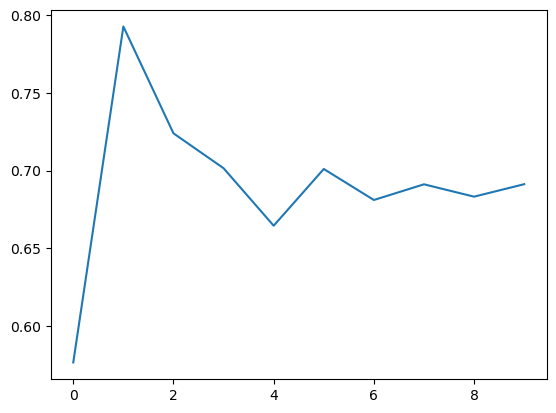

In [69]:
plt.plot(history['gen'])

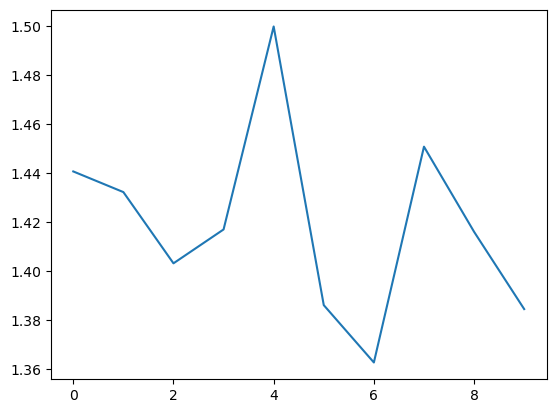

In [70]:
plt.plot(history['dis'])